<a href="https://colab.research.google.com/github/timberking2/ML_magistr/blob/main/%D0%A5%D1%83%D0%B4%D1%88%D0%B0%D1%8F_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

Не повторяем ошибок, импортим всё сразу!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

In [ ]:

PATH_TO_FILE: str = '/content/student-mat.csv' # Загрузка набора данных (ДОБАВИЛ ФАЙЛ)
## p.s. в левой панеле нажать на папку и перетащить туда файл,
## а wince.csv заменить на свой вариант (ПКМ -> копировать путь)

df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### EDA

In [ ]:

# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')

df['school'] = df['school'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('int')
df['address'] = df['address'].astype('category')
df['famsize'] = df['famsize'].astype('category')
df['Pstatus'] = df['Pstatus'].astype('category')
df['Medu'] = df['Medu'].astype('int')
df['Fedu'] = df['Fedu'].astype('int')
df['Mjob'] = df['Mjob'].astype('category')
df['Fjob'] = df['Fjob'].astype('category')
df['reason'] = df['reason'].astype('category')
df['guardian'] = df['guardian'].astype('category')
df['traveltime'] = df['traveltime'].astype('int')
df['studytime'] = df['studytime'].astype('int')
df['failures'] = df['failures'].astype('int')
df['schoolsup'] = df['schoolsup'].astype('category')
df['famsup'] = df['famsup'].astype('category')
df['paid'] = df['paid'].astype('category')
df['activities'] = df['activities'].astype('category')
df['nursery'] = df['nursery'].astype('category')
df['higher'] = df['higher'].astype('category')
df['internet'] = df['internet'].astype('category')
df['romantic'] = df['romantic'].astype('category')
df['famrel'] = df['famrel'].astype('int')
df['freetime'] = df['freetime'].astype('int')
df['goout'] = df['goout'].astype('int')
df['Dalc'] = df['Dalc'].astype('int')
df['Walc'] = df['Walc'].astype('int')
df['health'] = df['health'].astype('int')
df['absences'] = df['absences'].astype('int')
df['G1'] = df['G1'].astype('int')
df['G2'] = df['G2'].astype('int')
df['G3'] = df['G3'].astype('int')

Целевая сосать

In [ ]:
target_col = 'romantic'
y = df[target_col]
print(f"Выбрана целевая переменная: '{target_col}'")
print(f"Распределение классов в '{target_col}':")
print(y.value_counts())
print(f"Пук пук: {df_clean.shape}")

Выбрана целевая переменная: 'romantic'
Распределение классов в 'romantic':
romantic
no     263
yes    132
Name: count, dtype: int64
Пук пук: (395, 33)


Ну и покажем на графиках что не так а что так, что у нас так и что не так)

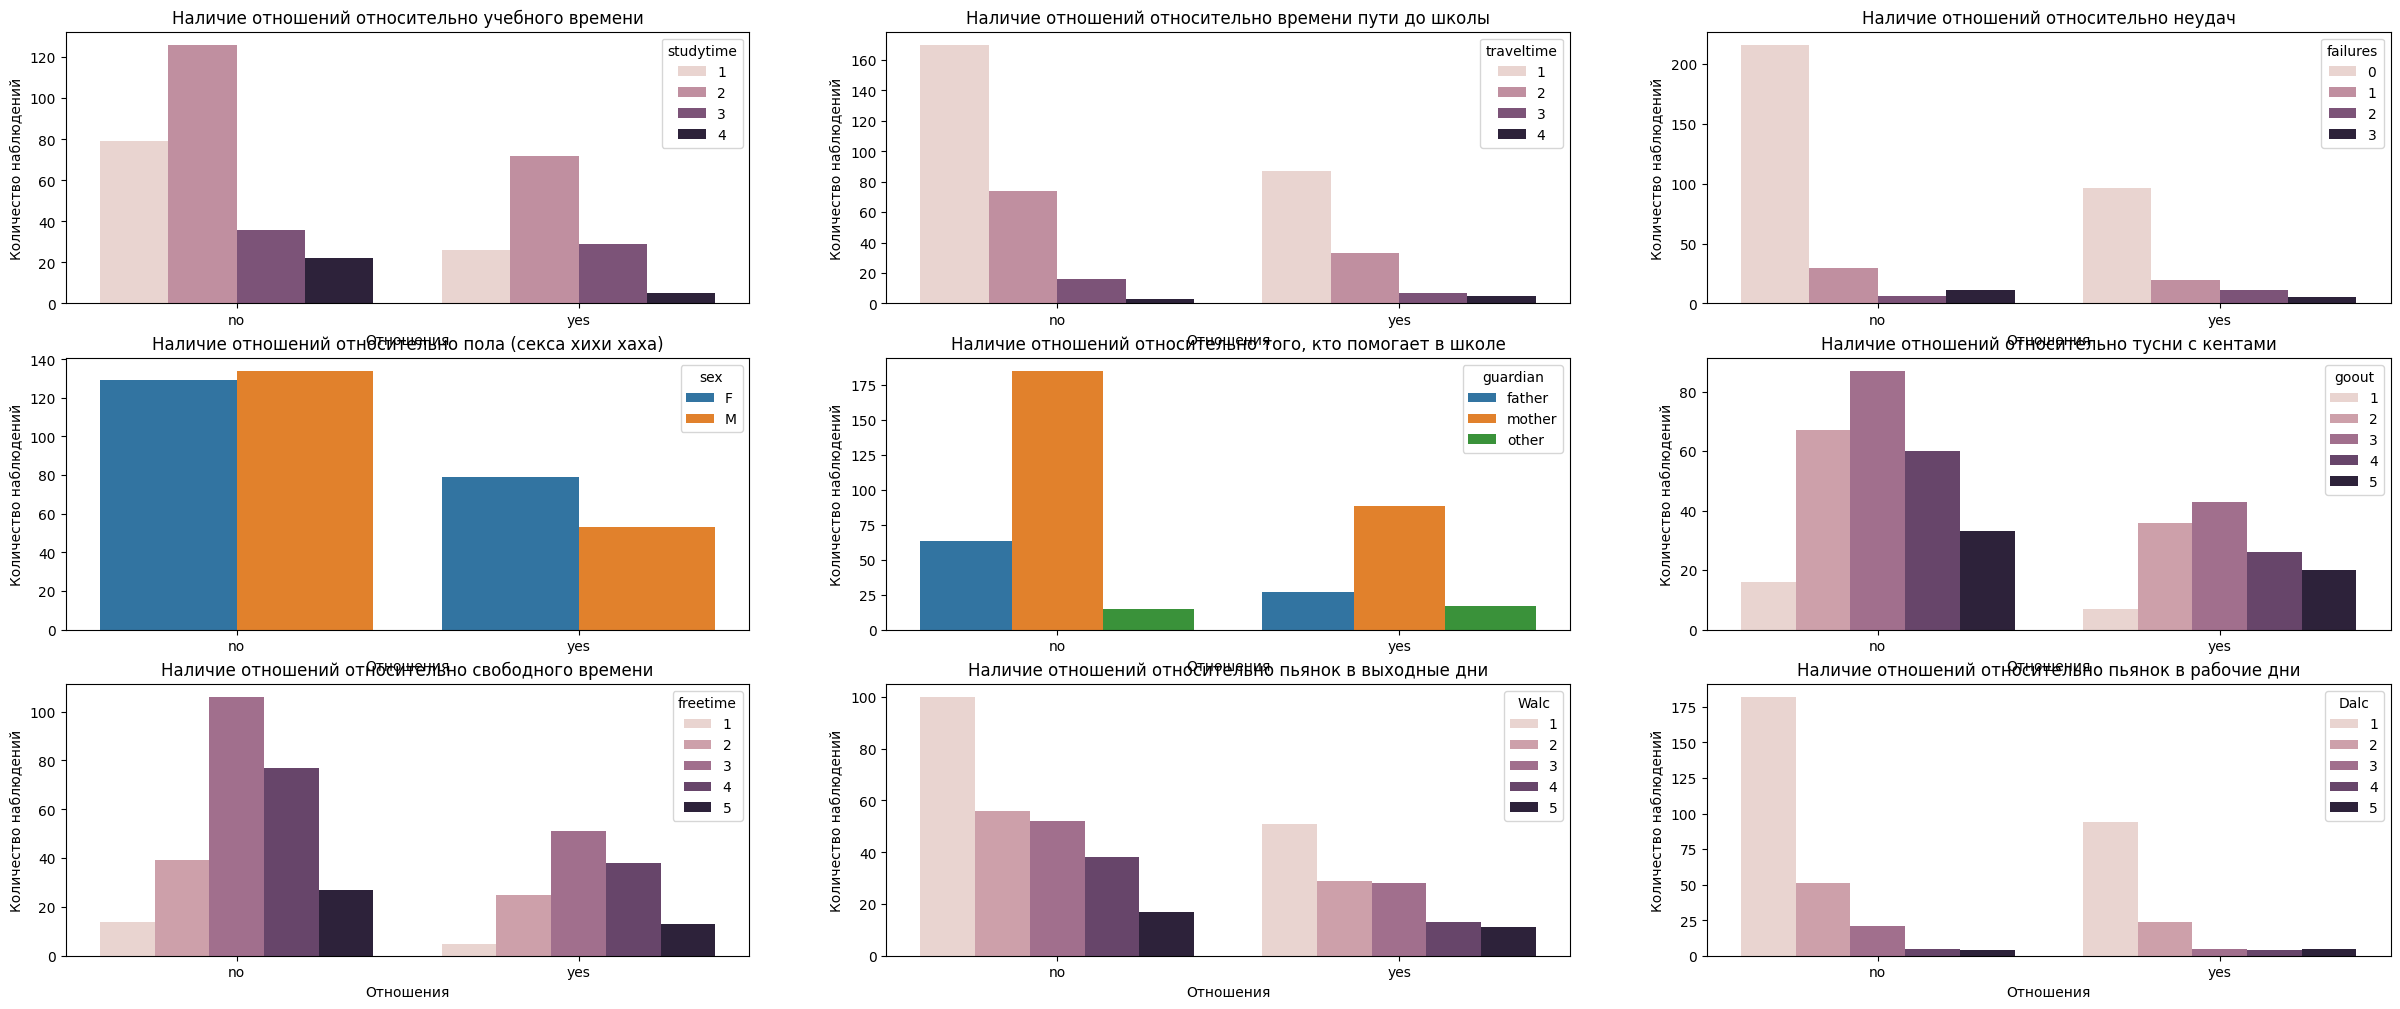

In [ ]:
plt.figure(figsize=(30, 12))

plt.subplot(3, 3, 1)
sns.countplot(data=df, x='romantic', hue='studytime')
plt.title('Наличие отношений относительно учебного времени')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 2)
sns.countplot(data=df, x='romantic', hue='traveltime')
plt.title('Наличие отношений относительно времени пути до школы')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 3)
sns.countplot(data=df, x='romantic', hue='failures')
plt.title('Наличие отношений относительно неудач')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 4)
sns.countplot(data=df, x='romantic', hue='sex')
plt.title('Наличие отношений относительно пола (секса хихи хаха)')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 5)
sns.countplot(data=df, x='romantic', hue='guardian')
plt.title('Наличие отношений относительно того, кто помогает в школе')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 6)
sns.countplot(data=df, x='romantic', hue='goout')
plt.title('Наличие отношений относительно тусни с кентами')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 7)
sns.countplot(data=df, x='romantic', hue='freetime')
plt.title('Наличие отношений относительно свободного времени')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 8)
sns.countplot(data=df, x='romantic', hue='Walc')
plt.title('Наличие отношений относительно пьянок в выходные дни')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 9)
sns.countplot(data=df, x='romantic', hue='Dalc')
plt.title('Наличие отношений относительно пьянок в рабочие дни')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()


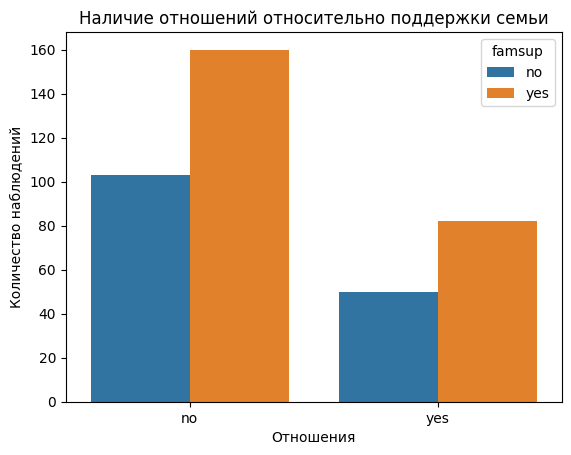

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='famsup')
plt.title('Наличие отношений относительно поддержки семьи')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

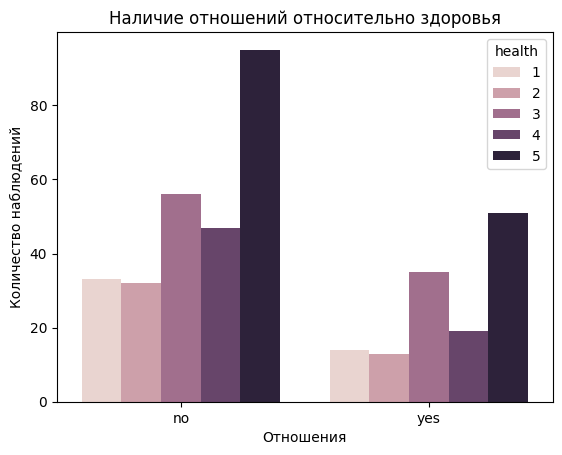

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='health')
plt.title('Наличие отношений относительно здоровья')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

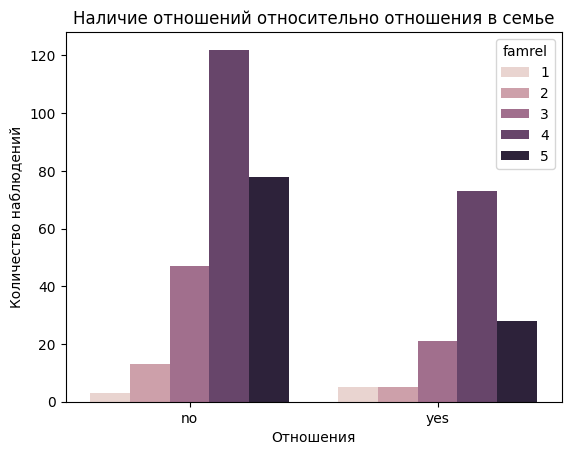

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='famrel')
plt.title('Наличие отношений относительно отношения в семье')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

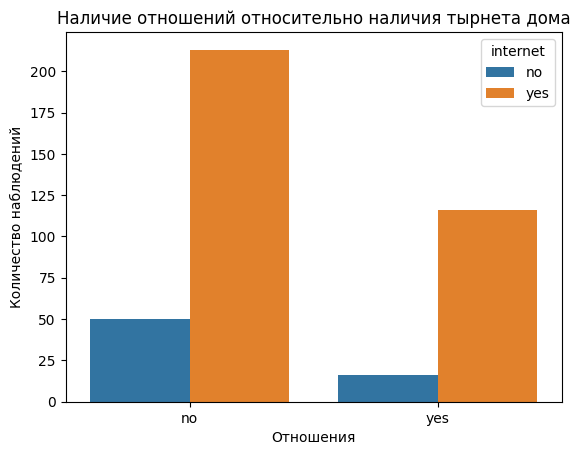

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='internet')
plt.title('Наличие отношений относительно наличия тырнета дома')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

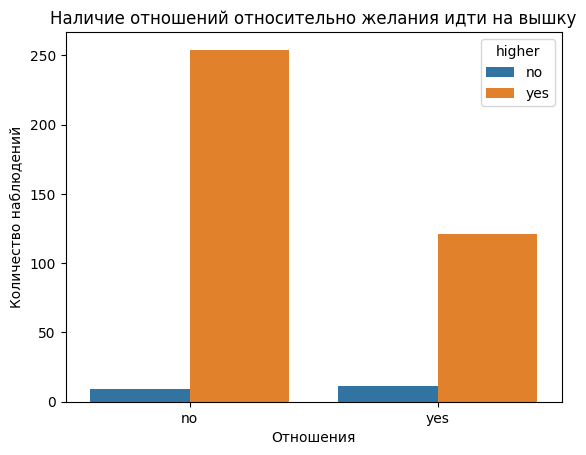

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='higher')
plt.title('Наличие отношений относительно желания идти на вышку')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

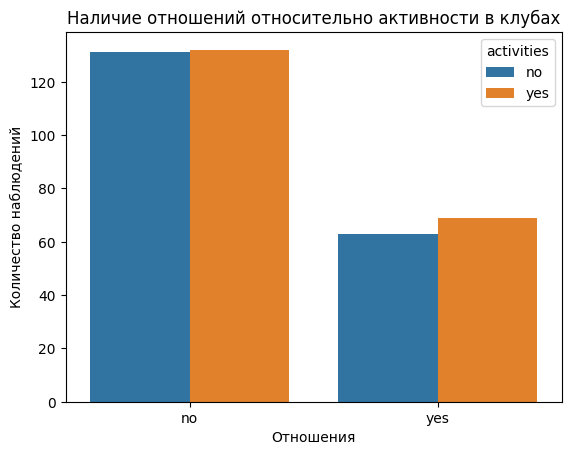

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='activities')
plt.title('Наличие отношений относительно активности в клубах')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

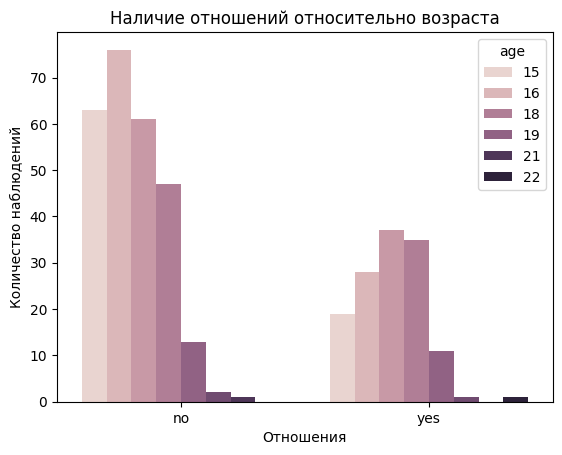

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='romantic', hue='age')
plt.title('Наличие отношений относительно возраста')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

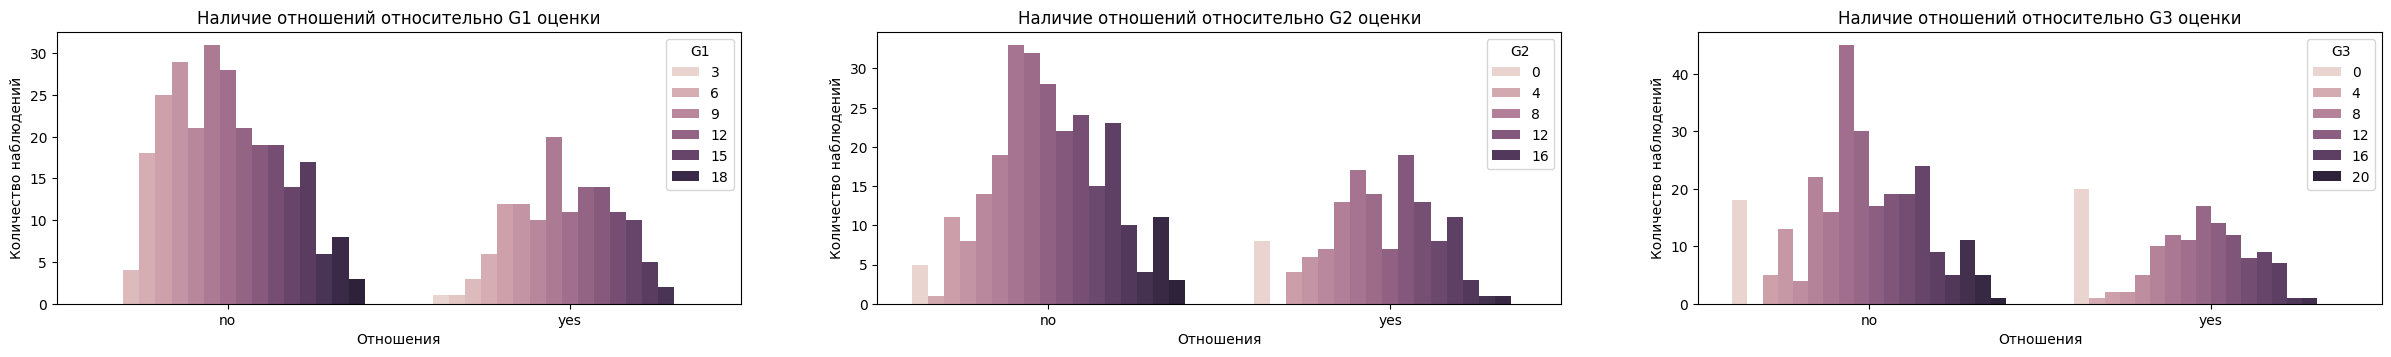

In [ ]:
plt.figure(figsize=(30, 12))

plt.subplot(3, 3, 1)
sns.countplot(data=df, x='romantic', hue='G1')
plt.title('Наличие отношений относительно G1 оценки')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 2)
sns.countplot(data=df, x='romantic', hue='G2')
plt.title('Наличие отношений относительно G2 оценки')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 3)
sns.countplot(data=df, x='romantic', hue='G3')
plt.title('Наличие отношений относительно G3 оценки')
plt.xlabel('Отношения')
plt.ylabel('Количество наблюдений')

plt.show()

Отметаем по анализу то, что не понравилось моему глазу (по аналитике пробежался, там изначально видно процентовку на датасете, глянул зависимости и они чет пустые, не решился добавлять все 33 столбца потому что долго и много места, вытащил самые показательные)

Потому убрал в числовых и категориальных списках много ka le

In [ ]:
# Таблица сопряженности и тест хи-квадрат для 'sex' и 'romantic'
contingency_table_sex = pd.crosstab(df[target_col], df['sex'])
print(f"\nТаблица сопряженности для {target_col} и 'sex':")
print(contingency_table_sex)

chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_table_sex)
print(f"\nТест хи-квадрат для {target_col} и 'sex':")
print(f"  Chi2-statistic: {chi2_sex:.2f}")
print(f"  p-value: {p_sex:.6f}")
if p_sex < 0.05:
    print("  -> Связь между переменными статистически значима (p < 0.05).")
else:
    print("  -> Связь между переменными статистически не значима (p >= 0.05).")


Таблица сопряженности для romantic и 'sex':
sex         F    M
romantic          
no        129  134
yes        79   53

Тест хи-квадрат для romantic и 'sex':
  Chi2-statistic: 3.69
  p-value: 0.054751
  -> Связь между переменными статистически не значима (p >= 0.05).


Сделали тестик для хи квадрата для того, чтобы узнать значима ли связь, и увидели что она не значима, соответственно, принимаем как факт, что связь не значима и двигаемся дальше

Приколы с best_фичами

In [ ]:
all_features = df.columns.tolist()
all_features.remove(target_col)

# Выберем подмножество признаков для простоты, например:
# - Бинарные: higher, internet, schoolsup
# - Категориальные: Mjob, Fjob, reason
# - Порядковые: Dalc, Walc, freetime, goout
# - Числовые: G1, G2
# Это просто пример
numerical_features = ['G1', 'G2']
# Порядковые можно закодировать как категориальные или числовые. Рассмотрим как категориальные.
ordinal_features = ['Dalc', 'Walc', 'freetime', 'goout']
# Бинарные и мульти-категориальные
categorical_features_to_use = ['higher', 'internet', 'Mjob', 'Fjob', 'reason']

best_features_num = numerical_features
best_features_ord = ordinal_features
best_features_cat = categorical_features_to_use
best_features_all = best_features_num + best_features_ord + best_features_cat

print(f"Выбранные числовые признаки: {best_features_num}")
print(f"Выбранные порядковые признаки (будут закодированы как категориальные): {best_features_ord}")
print(f"Выбранные категориальные признаки: {best_features_cat}")
print(f"Всего признаков для модели: {len(best_features_all)}")

X_initial = df[best_features_all].copy()

Выбранные числовые признаки: ['G1', 'G2']
Выбранные порядковые признаки (будут закодированы как категориальные): ['Dalc', 'Walc', 'freetime', 'goout']
Выбранные категориальные признаки: ['higher', 'internet', 'Mjob', 'Fjob', 'reason']
Всего признаков для модели: 11


### Model

Дальше делаем нормализацию числовых и категориалок

In [ ]:
X_processed = X_initial.copy()

In [ ]:
# Объединим порядковые и категориальные признаки для кодирования
categorical_features_to_encode = best_features_ord + best_features_cat

if categorical_features_to_encode:
    # Используем OneHotEncoder для всех категориальных (включая порядковые)
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    encoded_cat_array = ohe.fit_transform(X_processed[categorical_features_to_encode])
    encoded_cat_feature_names = ohe.get_feature_names_out(categorical_features_to_encode)
    encoded_cat_df = pd.DataFrame(encoded_cat_array, columns=encoded_cat_feature_names, index=X_processed.index)

    X_processed = X_processed.drop(columns=categorical_features_to_encode)
    X_processed = pd.concat([X_processed, encoded_cat_df], axis=1)

print(f"Форма X после OneHot Encoding: {X_processed.shape}")

Форма X после OneHot Encoding: (395, 31)


In [ ]:
# Нормализация числовых признаков
if best_features_num:
    scaler = MinMaxScaler()
    X_scaled = X_processed.copy()
    X_scaled[best_features_num] = scaler.fit_transform(X_processed[best_features_num])
else:
    # Если числовых признаков нет, X_scaled = X_processed
    X_scaled = X_processed
    scaler = None # Не будем использовать scaler, если нет числовых признаков

X = X_scaled
print(f"Форма X после нормализации: {X.shape}")
print("\nПервые строки обработанного X:")
print(X.head())


Форма X после нормализации: (395, 31)

Первые строки обработанного X:
       G1        G2  Dalc_2  Dalc_3  Dalc_4  Dalc_5  Walc_2  Walc_3  Walc_4  \
0  0.1250  0.315789     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1  0.1250  0.263158     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  0.2500  0.421053     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
3  0.7500  0.736842     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  0.1875  0.526316     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

   Walc_5  ...  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
0     0.0  ...         0.0            0.0           0.0          0.0   
1     0.0  ...         0.0            0.0           0.0          0.0   
2     0.0  ...         0.0            0.0           0.0          0.0   
3     0.0  ...         0.0            0.0           0.0          0.0   
4     0.0  ...         1.0            0.0           0.0          0.0   

   Fjob_other  Fjob_se

In [ ]:
# Обучаем нашу супер пупер модельку

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Объявление и обучение модели
model = LogisticRegression(
    penalty='l2', # Используем L2 регуляризацию для стабильности
    random_state=42,
    max_iter=1000
)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Функция оценки
def evaluate_classification(y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

print("\nМетрики на обучающей выборке:")
train_metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

print("\nМетрики на тестовой выборке:")
test_metrics = evaluate_classification(y_test, y_test_pred, y_test_proba)


Метрики на обучающей выборке:
=== Метрики классификации ===
Accuracy:  0.6957
Precision: 0.7115
Recall:    0.6957
F1-score:  0.6146
ROC-AUC:   0.6819

Confusion Matrix:
[[180   4]
 [ 80  12]]

Метрики на тестовой выборке:
=== Метрики классификации ===
Accuracy:  0.6723
Precision: 0.6705
Recall:    0.6723
F1-score:  0.5624
ROC-AUC:   0.5427

Confusion Matrix:
[[78  1]
 [38  2]]


In [ ]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: ['no' 'yes']


Посмеялись над количеством наполнения и муваемся дальше

Вывод кэфов модельки

In [ ]:
feature_names = X.columns.tolist()
coefficients = model.coef_

print(f"Количество классов: {len(model.classes_)} (бинарная классификация: {model.classes_})")
print(f"Количество признаков: {len(feature_names)}")
print(f"Форма коэффициентов: {coefficients.shape}")

Количество классов: 2 (бинарная классификация: ['no' 'yes'])
Количество признаков: 31
Форма коэффициентов: (1, 31)


In [ ]:
# В бинарной классификации coef_ имеет форму (1, n_features)
print(f"\nКоэффициенты (и их противоположные значения), определяющие границу между '{model.classes_[0]}' и '{model.classes_[1]}':")

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_for_' + str(model.classes_[0]): coefficients[0],
    'Coefficient_for_' + str(model.classes_[1]): -coefficients[0]
}).sort_values(by='Coefficient_for_' + str(model.classes_[0]), key=abs, ascending=False)

print(coeff_df)


Коэффициенты (и их противоположные значения), определяющие границу между 'no' и 'yes':
              Feature  Coefficient_for_no  Coefficient_for_yes
1                  G2           -1.417061             1.417061
19       internet_yes            0.839255            -0.839255
3              Dalc_3           -0.649881             0.649881
0                  G1            0.627331            -0.627331
23       Mjob_teacher           -0.612540             0.612540
4              Dalc_4            0.608033            -0.608033
27       Fjob_teacher           -0.570496             0.570496
25         Fjob_other           -0.542048             0.542048
10         freetime_2            0.492799            -0.492799
18         higher_yes           -0.446570             0.446570
15            goout_3            0.348372            -0.348372
26      Fjob_services           -0.294936             0.294936
5              Dalc_5            0.272834            -0.272834
13         freetime_5         